In [25]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Sequential 
from keras.utils import to_categorical 
import numpy as np
import matplotlib.pyplot as plt

In [26]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [27]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

'''
When using a convolutional layer as the first layer to our model,
 we need to reshape our data to (n_images, x_shape, y_shape, channels).
  All you really need to know is that you should set channels to 1 for grayscale images
   and set channels to 3 when you have a set of RGB-images as input.
'''

'\nWhen using a convolutional layer as the first layer to our model,\n we need to reshape our data to (n_images, x_shape, y_shape, channels).\n  All you really need to know is that you should set channels to 1 for grayscale images\n   and set channels to 3 when you have a set of RGB-images as input.\n'

In [28]:
train_X.shape

(60000, 28, 28, 1)

In [29]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [30]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [31]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [32]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 84s 89ms/step - loss: 0.4672 - accuracy: 0.8320
Epoch 2/4
938/938 [==============================] - 83s 88ms/step - loss: 0.3143 - accuracy: 0.8868
Epoch 3/4
938/938 [==============================] - 83s 88ms/step - loss: 0.2744 - accuracy: 0.9001
Epoch 4/4
938/938 [==============================] - 85s 91ms/step - loss: 0.2467 - accuracy: 0.9111


In [33]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.2795 - accuracy: 0.8966
Test loss 0.2794618308544159
Test accuracy 0.8966000080108643


In [34]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))            # 9 different types of items.

313/313 [==============================] - 4s 13ms/step
9


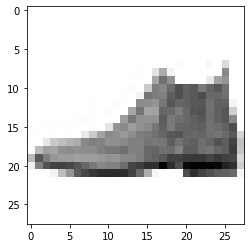

In [35]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

 Using AveragePooling2D  -->

In [36]:
model1 = Sequential()
model1.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model1.add(Activation('relu'))
model1.add(AveragePooling2D(pool_size=(2,2)))
model1.add(Conv2D(64, (3,3)))
model1.add(Activation('relu'))
model1.add(AveragePooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


model1.fit(train_X, train_Y_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 73s 78ms/step - loss: 0.5420 - accuracy: 0.8038
Epoch 2/4
938/938 [==============================] - 73s 78ms/step - loss: 0.3656 - accuracy: 0.8691
Epoch 3/4
938/938 [==============================] - 73s 78ms/step - loss: 0.3169 - accuracy: 0.8853
Epoch 4/4
938/938 [==============================] - 73s 78ms/step - loss: 0.2903 - accuracy: 0.8962


In [37]:
test_loss, test_acc = model1.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.3137 - accuracy: 0.8882
Test loss 0.31367987394332886
Test accuracy 0.8881999850273132


In [38]:
predictions = model1.predict(test_X)
print(np.argmax(np.round(predictions[0])))   

313/313 [==============================] - 4s 13ms/step
9


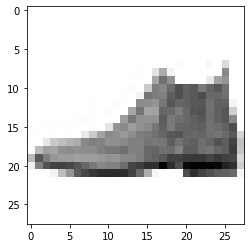

In [39]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()